## Importing Libraries

In [27]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Load the dataset

In [28]:
data = pd.read_csv("./bank-full.csv")
#data = data.dropna()
print(data.shape)
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


## Displaying the First Few Rows of the Dataset

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyzing Job Distribution in the Dataset

In [30]:
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

## Analyzing Education Distribution in the Dataset

In [31]:
data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

## Visualizing Deposit Distribution

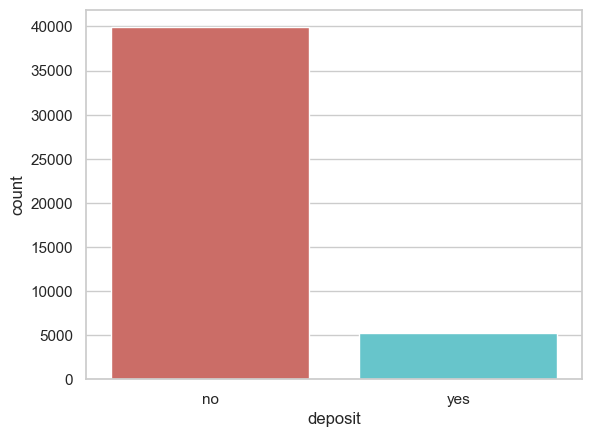

In [32]:
sns.countplot(x = 'deposit',data=data, palette='hls')
plt.show()

## Analyzing Subscription Rates

In [33]:
# Calculate and print the percentage of 'no' subscription
count_no_sub = len(data[data['deposit']=='no'])
count_sub = len(data[data['deposit']=='yes'])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

# Calculate and print the percentage of 'yes' subscription
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)


percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


## Mean Age Analysis by Subscription Status

In [34]:
# Calculate the mean age grouped by 'deposit'
data.groupby('deposit')['age'].mean()

deposit
no     40.838986
yes    41.670070
Name: age, dtype: float64

## Displaying the First Few Rows of the Dataset

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## One-Hot Encoding Categorical Variables and Feature Selection

In [36]:
# List of categorical variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']

# Perform one-hot encoding for each categorical variable
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

# Identify non-categorical variables to keep
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

## Finalizing the Dataset

In [37]:
# Create the final dataset by keeping non-categorical variables
data_final = data[to_keep]

# Display the column names of the final dataset
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

## Extracting Features and Target Variable

In [38]:
# Extract column names from the final dataset
data_final_vars = data_final.columns.values.tolist()

# Define the target variable (y)
y = ['deposit']

# Define the features (X) by excluding the target variable
X = [i for i in data_final_vars if i not in y]

## Defining Target Variable and Features

In [39]:
# Define the target variable (y)
y = data['deposit']

# Define the features (X) from the finalized dataset
X = data_final[X]

## Display the value counts for the target variable (y)

In [40]:
y.value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

## Display the shapes of the features (X) and target variable (y)

In [41]:
X.shape, y.shape

((45211, 51), (45211,))

## Transform the target variable (y) using a lambda function

In [42]:
y = y.apply(lambda x: 1 if x == "yes" else 0)

## Splitting the Dataset into Training and Testing Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature Selection with Recursive Feature Elimination (RFE) and Logistic Regression

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
logreg = LogisticRegression()
rfe = RFE(logreg, step = 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True False False
  True False False  True False False False False  True False  True  True
 False False False False  True  True False  True  True  True  True  True
  True  True  True False False  True  True  True False  True  True  True
  True  True  True]
[3 4 3 4 3 4 3 3 2 1 4 4 1 4 2 1 3 4 4 3 1 3 1 1 3 4 2 2 1 1 3 1 1 1 1 1 1
 1 1 4 2 1 1 1 2 1 1 1 1 1 1]


## Columns After Elimination

In [46]:
cols = X.columns[rfe.support_]

In [47]:
X=data_final[cols]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Logistic Regression Prediction and Evaluation

In [49]:
# Predict the target variable (y) using the logistic regression classifier
y_pred = logreg.predict(X_test)

# Display the accuracy of the logistic regression classifier on the test set
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


## Confusion Matrix for Model Evaluation

In [50]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for model evaluation
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)

[[11794   175]
 [ 1312   283]]


## Classification Report for Model Evaluation

In [51]:
from sklearn.metrics import classification_report

# Generate a classification report for model evaluation
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.62      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



## Receiver Operating Characteristic (ROC) Curve and AUC

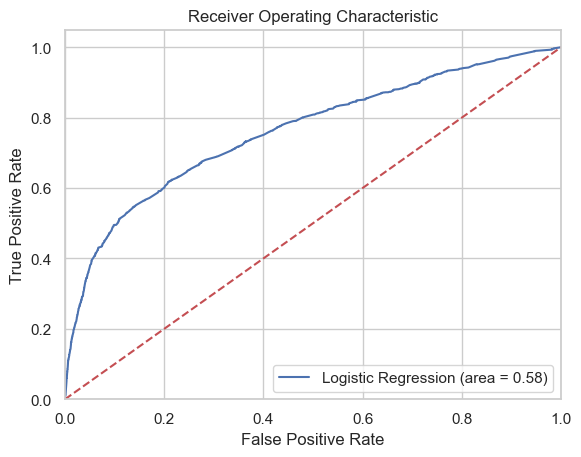

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate ROC AUC score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()